In [1]:
import bnn
import numpy as np
import os

In [2]:
class loadDataset():
    def __init__(self,path):
        self.dir= path

    def load_images(self,filename):
        with open(os.path.join(self.dir,filename),'rb') as f:
            data = np.frombuffer(f.read(), np.uint8, offset=0)

        data=data.reshape(-1,3,32,32)
        return data

    def load_labels(self,filename):
        with open(os.path.join(self.dir,filename),'rb') as f:
            labels = np.frombuffer(f.read(), np.uint8, offset=0)
        return labels

In [3]:
hw_classifier = bnn.CnvClassifier(bnn.NETWORK_CNVW2A2,'own_dataset',bnn.RUNTIME_HW)
sw_classifier = bnn.CnvClassifier(bnn.NETWORK_CNVW2A2,'own_dataset',bnn.RUNTIME_SW)

In [4]:
print(hw_classifier.classes)

['Garrafa', 'Garrafao', 'Jarro', 'Pneu']


In [5]:
from PIL import Image

dataset=loadDataset(path='data')

images_set=dataset.load_images(filename='test-images.bin')
labels_set=dataset.load_labels(filename='test-labels.bin')

In [6]:
labels=[]
for i in range(labels_set.shape[0]):
    im=images_set[i]
    im=np.transpose(im,[2,1,0])
    im=Image.fromarray(im)
    class_out=hw_classifier.classify_image(im)
    labels.append(class_out)
    """"
    #print("Class number: {0}".format(class_out))
    #print("Class name: {0}".format(hw_classifier.class_name(class_out)))
    """

Inference took 4864.00 microseconds
Classification rate: 205.59 images per second
Inference took 4865.00 microseconds
Classification rate: 205.55 images per second
Inference took 4866.00 microseconds
Classification rate: 205.51 images per second
Inference took 4866.00 microseconds
Classification rate: 205.51 images per second
Inference took 4864.00 microseconds
Classification rate: 205.59 images per second
Inference took 4865.00 microseconds
Classification rate: 205.55 images per second
Inference took 4865.00 microseconds
Classification rate: 205.55 images per second
Inference took 4866.00 microseconds
Classification rate: 205.51 images per second
Inference took 4865.00 microseconds
Classification rate: 205.55 images per second
Inference took 4865.00 microseconds
Classification rate: 205.55 images per second
Inference took 4865.00 microseconds
Classification rate: 205.55 images per second
Inference took 4865.00 microseconds
Classification rate: 205.55 images per second
Inference took 4

Inference took 4864.00 microseconds
Classification rate: 205.59 images per second
Inference took 4865.00 microseconds
Classification rate: 205.55 images per second
Inference took 4865.00 microseconds
Classification rate: 205.55 images per second


In [7]:
labels=np.array(labels, dtype=np.uint8)
labels

array([2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 2, 0, 2, 0, 3, 0, 2, 0, 2, 0, 0, 3,
       2, 0, 2, 3, 0, 2, 2, 0, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 0, 3, 3, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1], dtype=uint8)

In [8]:
labels_set

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=uint8)

In [9]:
print('Overall Accuracy: {0:.4f}%' .format(sum(labels_set==labels)/len(labels_set)))

Overall Accuracy: 0.7714%


In [10]:
pred=[]
pred.append(sum(labels[labels_set==0]==0)/sum(labels_set==0))
pred.append(sum(labels[labels_set==1]==1)/sum(labels_set==1))
pred.append(sum(labels[labels_set==2]==2)/sum(labels_set==2))
pred.append(sum(labels[labels_set==3]==3)/sum(labels_set==3))
pred

[0.8666666666666667, 0.88, 0.40000000000000002, 0.92000000000000004]

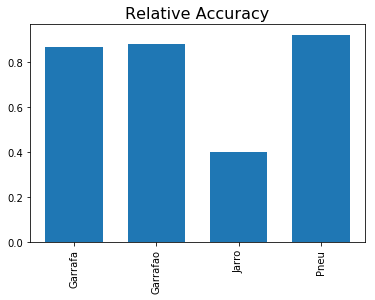

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

x_pos = np.arange(len(hw_classifier.classes))
fig, ax = plt.subplots()
ax.bar(x_pos,pred, 0.7)
ax.set_title('Relative Accuracy', fontsize=16)
ax.set_xticklabels(hw_classifier.classes, rotation='vertical')
ax.set_xticks(x_pos)
ax.set
plt.show()

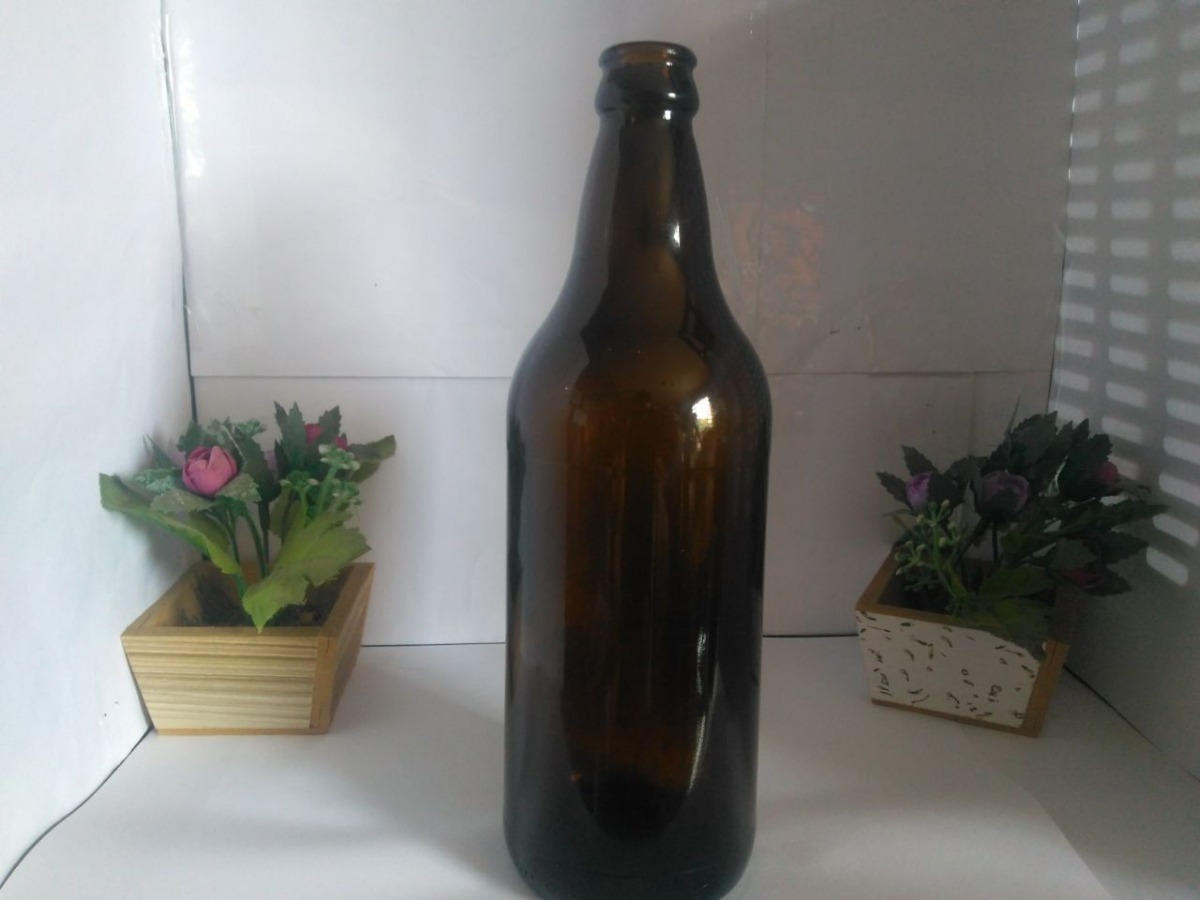

In [12]:
from PIL import Image
im=Image.open('data/garrafa.jpg')
im

In [13]:
rankingsW2A2 = hw_classifier.classify_image_details(im)
print("\n{: >10}{: >13}".format("[CLASS]","[RANKING]"))
for i in range(len(rankingsW2A2)):
    print("{: >10}{: >10}".format(hw_classifier.classes[i],rankingsW2A2[i]))
print("\nClass number: {0}".format(np.argmax(rankingsW2A2)))
print("Class name: {0}".format(hw_classifier.class_name(np.argmax(rankingsW2A2))))

Inference took 4865.00 microseconds
Classification rate: 205.55 images per second

   [CLASS]    [RANKING]
   Garrafa        -5
  Garrafao       -23
     Jarro        47
      Pneu       -14

Class number: 2
Class name: Jarro


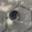

In [14]:
im=images_set[labels_set==2]
im=im[18]
im=Image.fromarray(np.transpose(im,[2,1,0]))
im

In [15]:
rankingsW2A2 = hw_classifier.classify_image_details(im)
print("\n{: >10}{: >13}".format("[CLASS]","[RANKING]"))
for i in range(len(rankingsW2A2)):
    print("{: >10}{: >10}".format(hw_classifier.classes[i],rankingsW2A2[i]))
print("\nClass number: {0}".format(np.argmax(rankingsW2A2)))
print("Class name: {0}".format(hw_classifier.class_name(np.argmax(rankingsW2A2))))

Inference took 4865.00 microseconds
Classification rate: 205.55 images per second

   [CLASS]    [RANKING]
   Garrafa         3
  Garrafao       -35
     Jarro        25
      Pneu       -21

Class number: 2
Class name: Jarro


In [16]:
from pynq import Xlnk

xlnk = Xlnk()
xlnk.xlnk_reset()